## Deliverable 2: Scrape and Analyze Mars Weather Data

In [117]:
# Import libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.ticker import AutoMinorLocator

In [74]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [75]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [76]:
# Create a Beautiful Soup Object
html = browser.html
soupobj = soup(html, 'html.parser')
print(soupobj)

<html lang="en"><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="description"/>
<title>Mars Temperature Data</title>
<link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
<link href="css/temp.css" rel="stylesheet" type="text/css"/>
</head>
<body>
<main>
<div class="container py-4">
<header class="pb-3 mb-4 border-bottom">
<a class="d-flex align-items-center text-dark text-decoration-none" href="/">
<span class="fs-4">Mission To Mars</span>
</a>
</header>
<div class="p-5 mb-4 bg-light rounded-3">
<div class="container-fluid py-5">
<h1 class="display-5 fw-bold">Mars Temperature Data</h1>
<p class="col-md-8 fs-4">This is Mars data.</p>
<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>

In [77]:
# Extract all rows
for allDataRows in soupobj.findAll(attrs={'class' : 'table'}):
    allDataRows = allDataRows.text.strip()
    print(allDataRows)

id
terrestrial_date
sol
ls
month
min_temp
pressure


2
2012-08-16
10
155
6
-75.0
739.0


13
2012-08-17
11
156
6
-76.0
740.0


24
2012-08-18
12
156
6
-76.0
741.0


35
2012-08-19
13
157
6
-74.0
732.0


46
2012-08-20
14
157
6
-74.0
740.0


57
2012-08-21
15
158
6
-78.0
740.0


68
2012-08-22
16
158
6
-77.0
740.0


79
2012-08-23
17
159
6
-76.0
742.0


112
2012-08-27
21
161
6
-74.0
741.0


114
2012-08-28
22
162
6
-74.0
742.0


123
2012-08-29
23
162
6
-75.0
741.0


134
2012-08-30
24
163
6
-75.0
742.0


145
2012-08-31
25
163
6
-75.0
743.0


156
2012-09-01
26
164
6
-76.0
745.0


163
2012-09-02
27
164
6
-75.0
743.0


170
2012-09-03
28
165
6
-75.0
745.0


171
2012-09-04
29
166
6
-75.0
747.0


172
2012-09-05
30
166
6
-74.0
747.0


173
2012-09-06
31
167
6
-74.0
745.0


175
2012-09-08
33
168
6
-73.0
748.0


176
2012-09-10
34
168
6
-73.0
748.0


177
2012-09-11
35
169
6
-73.0
749.0


178
2012-09-12
36
169
6
-73.0
750.0


179
2012-09-13
37
170
6
-73.0
750.0


180
2012-09-14
38
171
6
-73.0
750.0


181
20

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [78]:
# Create an empty list

tableDatalist = []
# Loop through the scraped data to create a list of rows

tableHeader = soupobj.find_all('th')

colHeaders=[]
for headerElements in tableHeader:
    title=headerElements.text
    colHeaders.append(title)
    
colHeaders

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [81]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df=pd.DataFrame(columns=colHeaders)
#df

for record in soupobj.find_all('tr',class_='data-row'):
        data = record.find_all('td')
        rowData=[td.text.strip() for td in data]
        lenghth=len(df)
        df.loc[lenghth]=rowData


In [82]:
# Confirm DataFrame was created successfully
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


# Step 4: Data Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [83]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [84]:
# Change data types for data analysis

df['id']=df['id'].astype(int)
df['terrestrial_date']=pd.to_datetime(df['terrestrial_date'])
df['sol']=df['sol'].astype(int)
df['ls']=df['ls'].astype(int)
df['month']=df['month'].astype(int)
df['min_temp']=df['min_temp'].astype(float)
df['pressure']=df['pressure'].astype(float)

In [85]:
# Confirm type changes were successful by examining data types again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 116.7 KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?

months=marsdf['month'].nunique()
print(f'There are', months ,'months on Mars.')

1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [89]:
df['month'].nunique()

12

In [92]:
# 2. How many Martian days' worth of data are there?
marsNoofDaysData=df['sol'].nunique()
marsNoofDaysData

1867

In [93]:
avgLowTemp=[]

for i in range(1,months+1):
    weather_per_month={"month_nb":"","avg_min_temp":""}
    avg_min_temp_month=df.loc[df['month']==i]['min_temp'].mean()
    round_avg_min_temp_month = round(avg_min_temp_month,0)
    weather_per_month["month_nb"] = i
    weather_per_month["avg_min_temp"] = round_avg_min_temp_month
    avgLowTemp.append(weather_per_month)    

print(avgLowTemp)     


[{'month_nb': 1, 'avg_min_temp': -77.0}, {'month_nb': 2, 'avg_min_temp': -80.0}, {'month_nb': 3, 'avg_min_temp': -83.0}, {'month_nb': 4, 'avg_min_temp': -83.0}, {'month_nb': 5, 'avg_min_temp': -79.0}, {'month_nb': 6, 'avg_min_temp': -75.0}, {'month_nb': 7, 'avg_min_temp': -72.0}, {'month_nb': 8, 'avg_min_temp': -68.0}, {'month_nb': 9, 'avg_min_temp': -69.0}, {'month_nb': 10, 'avg_min_temp': -72.0}, {'month_nb': 11, 'avg_min_temp': -72.0}, {'month_nb': 12, 'avg_min_temp': -74.0}]


In [106]:
avgPressure=[]

for i in range(1,months+1):
    weather_per_month={"month_nb":"","pressure":""}
    avg_pressure_month=df.loc[df['month']==i]['pressure'].mean()
    round_pressure_month = round(avg_pressure_month,0)
    
    weather_per_month["month_nb"] = i
    weather_per_month["pressure"] = round_pressure_month
    
    avgPressure.append(weather_per_month)    

print(avgPressure)  

[{'month_nb': 1, 'pressure': 862.0}, {'month_nb': 2, 'pressure': 889.0}, {'month_nb': 3, 'pressure': 877.0}, {'month_nb': 4, 'pressure': 806.0}, {'month_nb': 5, 'pressure': 749.0}, {'month_nb': 6, 'pressure': 745.0}, {'month_nb': 7, 'pressure': 795.0}, {'month_nb': 8, 'pressure': 874.0}, {'month_nb': 9, 'pressure': 913.0}, {'month_nb': 10, 'pressure': 887.0}, {'month_nb': 11, 'pressure': 857.0}, {'month_nb': 12, 'pressure': 842.0}]


In [121]:
avgTempPressure=[]

for i in range(1,months+1):
    weather_per_month={"month_nb":"","pressure":"","avg_min_temp":""}
    avg_pressure_month=df.loc[df['month']==i]['pressure'].mean()
    avg_min_temp_month=df.loc[df['month']==i]['min_temp'].mean()

    round_pressure_month = round(avg_pressure_month,0)
    round_avg_min_temp_month = round(avg_min_temp_month,0)

    weather_per_month["month_nb"] = i
    weather_per_month["pressure"] = round_pressure_month
    weather_per_month["avg_min_temp"] = round_avg_min_temp_month

    
    avgTempPressure.append(weather_per_month)    

print(avgTempPressure)  

[{'month_nb': 1, 'pressure': 862.0, 'avg_min_temp': -77.0}, {'month_nb': 2, 'pressure': 889.0, 'avg_min_temp': -80.0}, {'month_nb': 3, 'pressure': 877.0, 'avg_min_temp': -83.0}, {'month_nb': 4, 'pressure': 806.0, 'avg_min_temp': -83.0}, {'month_nb': 5, 'pressure': 749.0, 'avg_min_temp': -79.0}, {'month_nb': 6, 'pressure': 745.0, 'avg_min_temp': -75.0}, {'month_nb': 7, 'pressure': 795.0, 'avg_min_temp': -72.0}, {'month_nb': 8, 'pressure': 874.0, 'avg_min_temp': -68.0}, {'month_nb': 9, 'pressure': 913.0, 'avg_min_temp': -69.0}, {'month_nb': 10, 'pressure': 887.0, 'avg_min_temp': -72.0}, {'month_nb': 11, 'pressure': 857.0, 'avg_min_temp': -72.0}, {'month_nb': 12, 'pressure': 842.0, 'avg_min_temp': -74.0}]


In [122]:
import json
marstempPressureJSON = json.dumps(avgTempPressure)
# Save json as df file
monthlyTempPressureDF=pd.read_json(marstempPressureJSON)
monthlyTempPressureDF

,month_nb,pressure,avg_min_temp
0,1,862,-77
1,2,889,-80
2,3,877,-83
3,4,806,-83
4,5,749,-79
5,6,745,-75
6,7,795,-72
7,8,874,-68
8,9,913,-69
9,10,887,-72


In [96]:
# 3. What is the average low temperature by month?

# Export Python list to JSON file
import json
marstempJSON = json.dumps(avgLowTemp)
# Save json as df file
monthlyTempDF=pd.read_json(marstempJSON)
monthlyTempDF

,month_nb,avg_min_temp
0,1,-77
1,2,-80
2,3,-83
3,4,-83
4,5,-79
5,6,-75
6,7,-72
7,8,-68
8,9,-69
9,10,-72


In [123]:
# 4. Average pressure by Martian month

# Export Python list to JSON file
import json
marsPressureJSON = json.dumps(avgPressure)
# Save json as df file
monthlyPressureDF=pd.read_json(marsPressureJSON)
monthlyPressureDF

,month_nb,pressure
0,1,862
1,2,889
2,3,877
3,4,806
4,5,749
5,6,745
6,7,795
7,8,874
8,9,913
9,10,887


Text(0.5, 1.0, 'Average Minimum Temperature by Month')

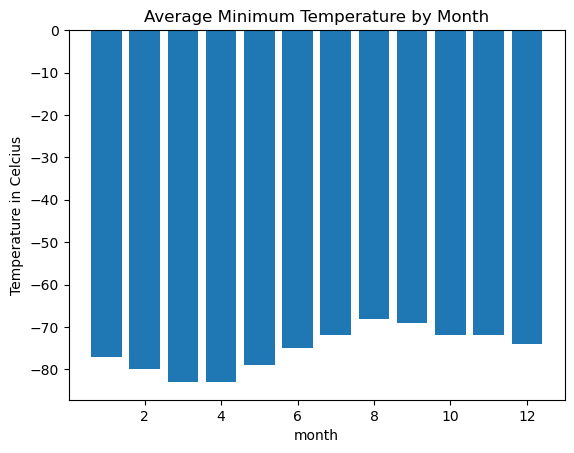

In [97]:
# Plot the average temperature by month

plt.bar(monthlyTempDF['month_nb'],monthlyTempDF['avg_min_temp'])

# Create labels for the x and y axes.
plt.xlabel("month")
plt.ylabel("Temperature in Celcius")

# Create title 
plt.title('Average Minimum Temperature by Month')

Text(0.5, 1.0, 'Pressure by Month')

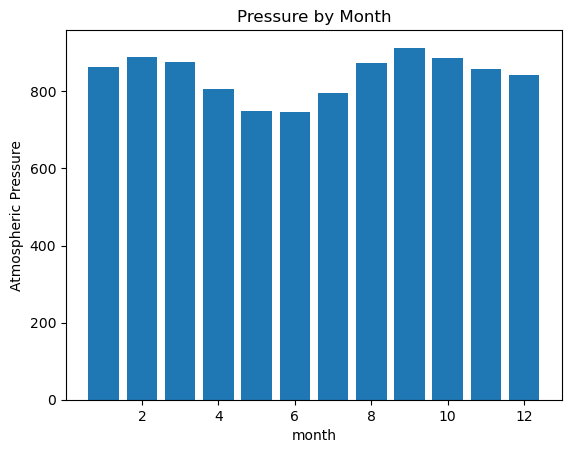

In [108]:
# Plot the average pressure by month

plt.bar(monthlyPressureDF['month_nb'],monthlyPressureDF['pressure'])

# Create labels for the x and y axes.
plt.xlabel("month")
plt.ylabel("Atmospheric Pressure")

# Create title 
plt.title('Pressure by Month')

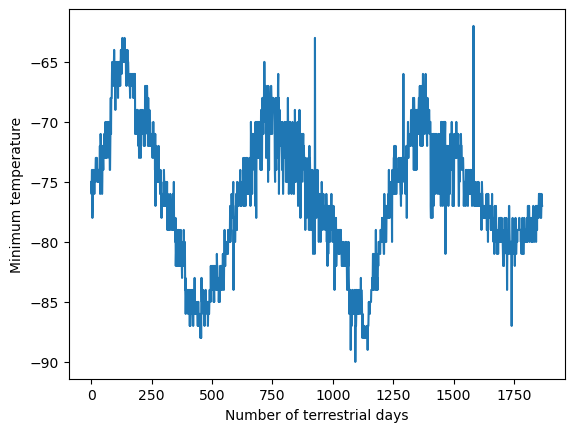

In [19]:
# 5. How many terrestrial (earth) days are there in a Martian year?


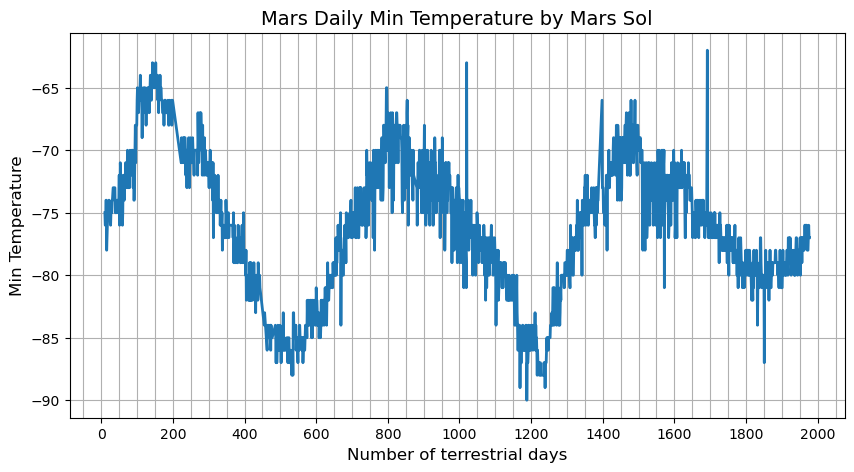

In [132]:
# 5. How many terrestrial (earth) days are there in a Martian year?

def plot2D(x, y, title):
    plt.rc('lines', linewidth=2, color='r')
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Number of terrestrial days', fontsize=12)
    ax.set_ylabel('Min Temperature', fontsize=12)
    ax.set_xticks(np.arange(0, 2001, 200))
    ax.xaxis.set_minor_locator(AutoMinorLocator(4))
    ax.tick_params(axis='x', which='minor', bottom=False)
    ax.set_yticks(np.arange(-60, -96, -5))
    ax.grid(which='both')
    ax.plot(x, y, '-')
    # Show Figure
    plt.show()

plot2D(df['sol'], df['min_temp'], 'Mars Daily Min Temperature by Mars Sol')


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Export the Data

Export the DataFrame to a CSV file.

In [137]:
# Write the data to a CSV
marsdatafilename = './Data/marsdata.csv'
df.to_csv(marsdatafilename, index=False)


In [133]:
browser.quit()